## IMPORTS & SETUP

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet  # install via: pip install prophet
import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

## LOAD DATA

In [14]:
df = pd.read_excel("Stock Price Data.xlsx")

# Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])
price_cols = ['Close/Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data shape:", df.shape)
print("Stocks in dataset:", df['Stock'].unique())
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Data shape: (10060, 10)
Stocks in dataset: ['AAPL' 'TSLA' 'MSFT' 'AMZN']
Date range: 2015-07-13 00:00:00 to 2025-07-11 00:00:00


## FORECASTING FUNCTION

In [15]:
def forecast_stock(stock_name, df, years_ahead=5):
    """
    Forecasts stock price using Prophet up to a specified number of years ahead.
    """
    print(f"\n=== Forecasting {stock_name} ===")
    
    # Filter stock data
    stock_df = df[df['Stock'] == stock_name][['Date', 'Close/Last']].rename(
        columns={'Date': 'ds', 'Close/Last': 'y'}
    )
    
    # Create and fit Prophet model
    m = Prophet(daily_seasonality=True)
    m.fit(stock_df)
    
    # Create future dataframe up to desired year
    future = m.make_future_dataframe(periods=252*years_ahead)  # 252 trading days per year
    
    # Forecast
    forecast = m.predict(future)
    
    # Plot results
    fig = m.plot(forecast)
    plt.title(f"{stock_name} Forecast until {stock_df['ds'].max().year + years_ahead}")
    plt.xlabel("Date")
    plt.ylabel("Close Price ($)")
    plt.show()
    
    # Also return forecast dataframe
    return forecast

## FORECAST ALL STOCKS TO 2030


=== Forecasting AAPL ===


20:39:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:58 - cmdstanpy - INFO - Chain [1] done processing


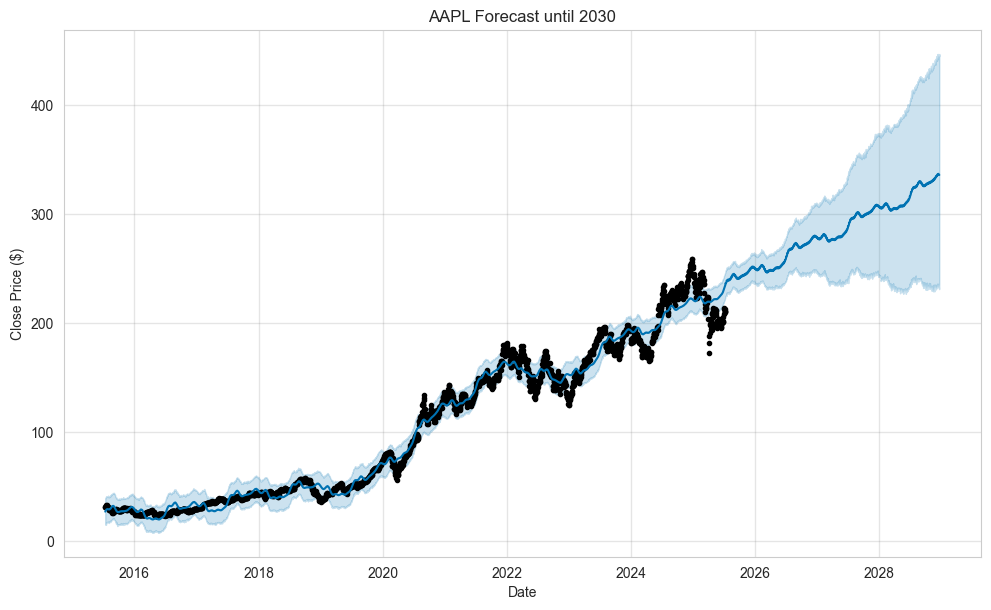

20:39:59 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting TSLA ===


20:39:59 - cmdstanpy - INFO - Chain [1] done processing


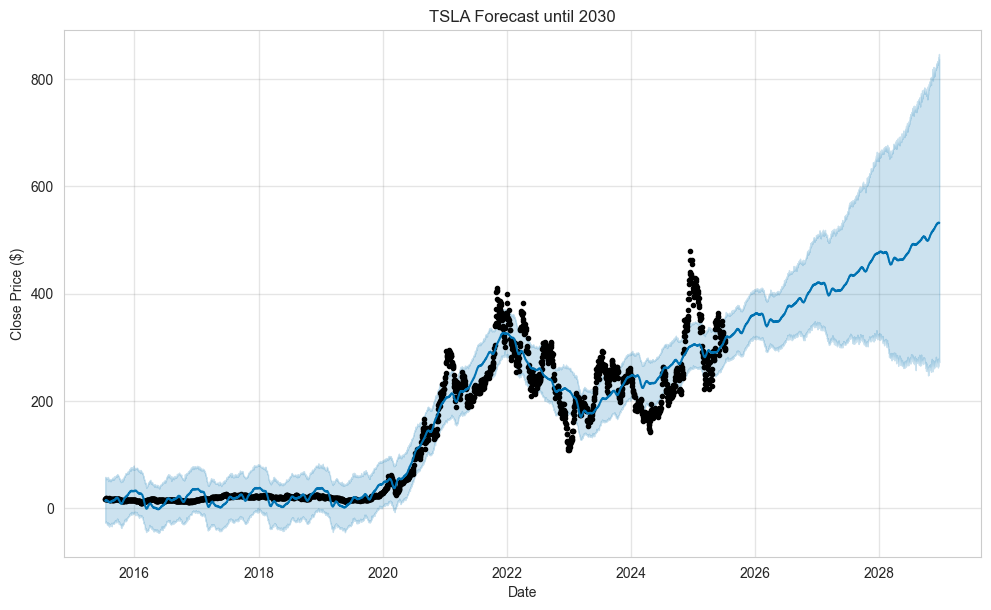

20:40:00 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting MSFT ===


20:40:02 - cmdstanpy - INFO - Chain [1] done processing


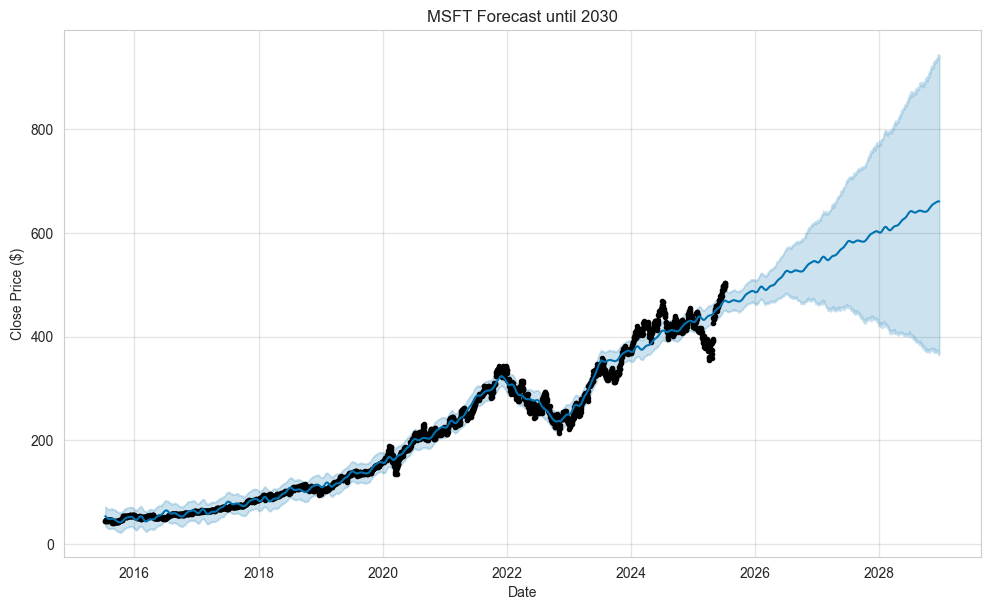

20:40:03 - cmdstanpy - INFO - Chain [1] start processing



=== Forecasting AMZN ===


20:40:04 - cmdstanpy - INFO - Chain [1] done processing


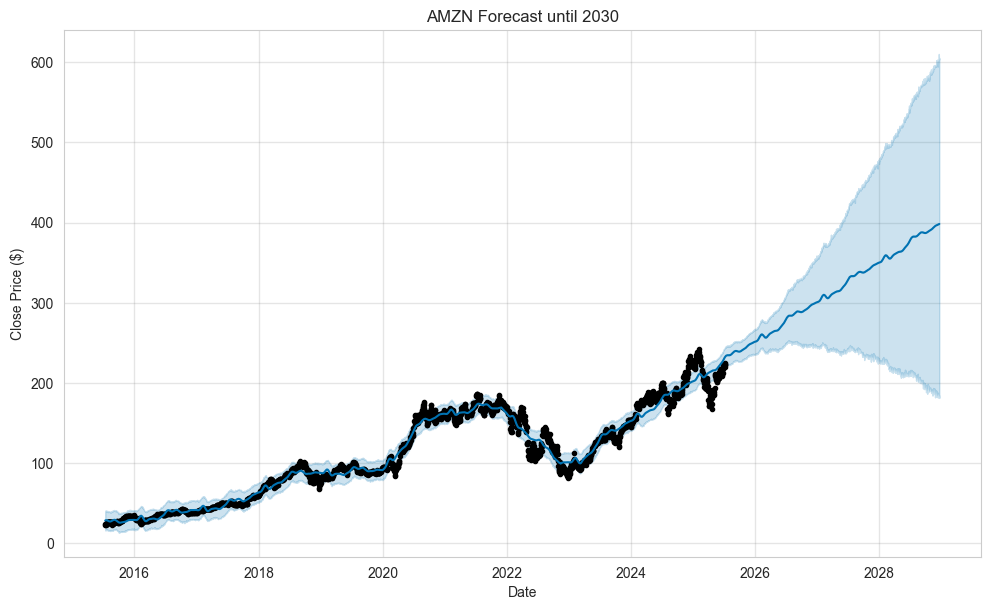

In [16]:
years_to_forecast = 2030 - df['Date'].max().year

all_forecasts = {}
for stock in df['Stock'].unique():
    all_forecasts[stock] = forecast_stock(stock, df, years_ahead=years_to_forecast)

## SAVE FORECAST RESULTS

In [17]:
# Combine all forecasts into a single CSV for documentation
forecast_results = []
for stock, forecast in all_forecasts.items():
    f = forecast.copy()
    f['Stock'] = stock
    forecast_results.append(f)

forecast_df = pd.concat(forecast_results)
forecast_df.to_csv("stock_forecasts_to_2030.csv", index=False)

print("\n✅ All forecasts complete! Results saved as stock_forecasts_to_2030.csv")


✅ All forecasts complete! Results saved as stock_forecasts_to_2030.csv
